# Personality

In [1]:
from constants import all_topics_names, folder_meicogsci, folder_meicogsci_2019, folder_models
from helping_functions import get_topics_for_abstract
import os
import json
import collections
import pandas
import statistics
import nltk
import gensim
import matplotlib.pyplot as plt

In [2]:
#here I am defining personality traits, that I will use afterwards
personality_traits = ["Agreeableness", "Conscientiousness", "Emotional range", "Extraversion", "Openness"]

In [3]:
lem = nltk.stem.WordNetLemmatizer()

In [4]:
model_21 = gensim.models.LdaModel.load(os.path.join("models", "LDA_21"))
model_21.minimum_probability = 0.0

In [5]:
# get all personality evaluvation files
all_files = os.listdir("personality")

In [6]:
# parse personality files to get the data for personality types
data_dict = collections.defaultdict(dict)
for filename in all_files:
    filename_id = filename.split("_")[-1].split(".")[0]
    with open(os.path.join("personality", filename)) as f:
        data = f.readlines()
        data = " ".join(data)
    data = json.loads(data)
    for trait in data["personality"]:
        data_dict[filename_id][trait["name"]] = trait["percentile"]

In [7]:
#put the all in the pandas frame
all_personality_data = pandas.DataFrame(data_dict).T

In [8]:
# calculate the topics for each abstract
all_files_by_topic = []
for filename in os.listdir(folder_meicogsci):
    all_files_by_topic.append(get_topics_for_abstract(folder_meicogsci, filename, model_21, lem))
for filename in os.listdir(folder_meicogsci_2019):
    all_files_by_topic.append(get_topics_for_abstract(folder_meicogsci_2019, filename, model_21, lem))

In [9]:
#here I am putting the topics into pandas, puting the id into index and deleting non-topic columns and renaming them
data_topics_pandas = pandas.DataFrame(all_files_by_topic)
data_topics_pandas.index = [f.split("_")[-1].split(".")[0] for f in data_topics_pandas[21]]
del data_topics_pandas[21]
del data_topics_pandas[22]
data_topics_pandas.columns = [all_topics_names[i] for i in data_topics_pandas.columns]

In [10]:
data_dict["626"]

{'Openness': 0.9996737157730256,
 'Conscientiousness': 0.4144360254483723,
 'Extraversion': 0.0871941715032179,
 'Agreeableness': 0.013253969154377987,
 'Emotional range': 0.36523761204885774}

In [11]:
# here I am calculating non-normalized personality for each topic
personality_by_topic = collections.defaultdict(dict)
topic_all_together = collections.defaultdict(int)
for current_row in data_topics_pandas.iterrows():
    name_of_row = str(current_row[0])
    if data_dict[name_of_row] != dict():
        for topic_name, value in current_row[1].items():
            for trait in personality_traits:
                try:
                    personality_by_topic[topic_name][trait] += value * data_dict[name_of_row][trait]
                except KeyError:
                    personality_by_topic[topic_name][trait] = value * data_dict[name_of_row][trait]
            topic_all_together[topic_name] += value

In [12]:
# and now I am normalizing the personality per topic
for topic_name in personality_by_topic:
    for trait in personality_traits:
        personality_by_topic[topic_name][trait] = personality_by_topic[topic_name][trait]/topic_all_together[topic_name]

In [13]:
#here is the data
pandas.DataFrame(personality_by_topic)

,pitch,movement,categorization,modeling,society,decision making,non-typical,neuroscience,constructivism,health,...,learning,verbalization,language,reasoning,attention,system,tasks,TMS,neural networks,reinforcment learning
Agreeableness,0.020556,0.017559,0.023079,0.013723,0.030735,0.036983,0.038645,0.014147,0.032283,0.041035,...,0.031649,0.029564,0.016370,0.017691,0.025739,0.013320,0.030939,0.016650,0.012432,0.011971
Conscientiousness,0.337945,0.397897,0.368144,0.394544,0.391270,0.418978,0.391555,0.397232,0.389362,0.409889,...,0.431184,0.330237,0.365652,0.397885,0.393439,0.402975,0.408663,0.425882,0.397055,0.409419
Emotional range,0.253800,0.351413,0.294415,0.417964,0.315260,0.378580,0.225261,0.261519,0.304472,0.245579,...,0.326269,0.283178,0.404214,0.363868,0.328016,0.466057,0.418715,0.313433,0.411435,0.518932
Extraversion,0.183373,0.170307,0.211445,0.227180,0.265406,0.266583,0.165337,0.118206,0.225600,0.135000,...,0.199091,0.180795,0.238576,0.168693,0.253259,0.246558,0.231687,0.132809,0.187064,0.195868
Openness,0.988269,0.984375,0.995220,0.993616,0.990998,0.990347,0.988523,0.985998,0.995625,0.963412,...,0.984829,0.993083,0.995132,0.992449,0.992793,0.992331,0.988570,0.984493,0.990728,0.991514


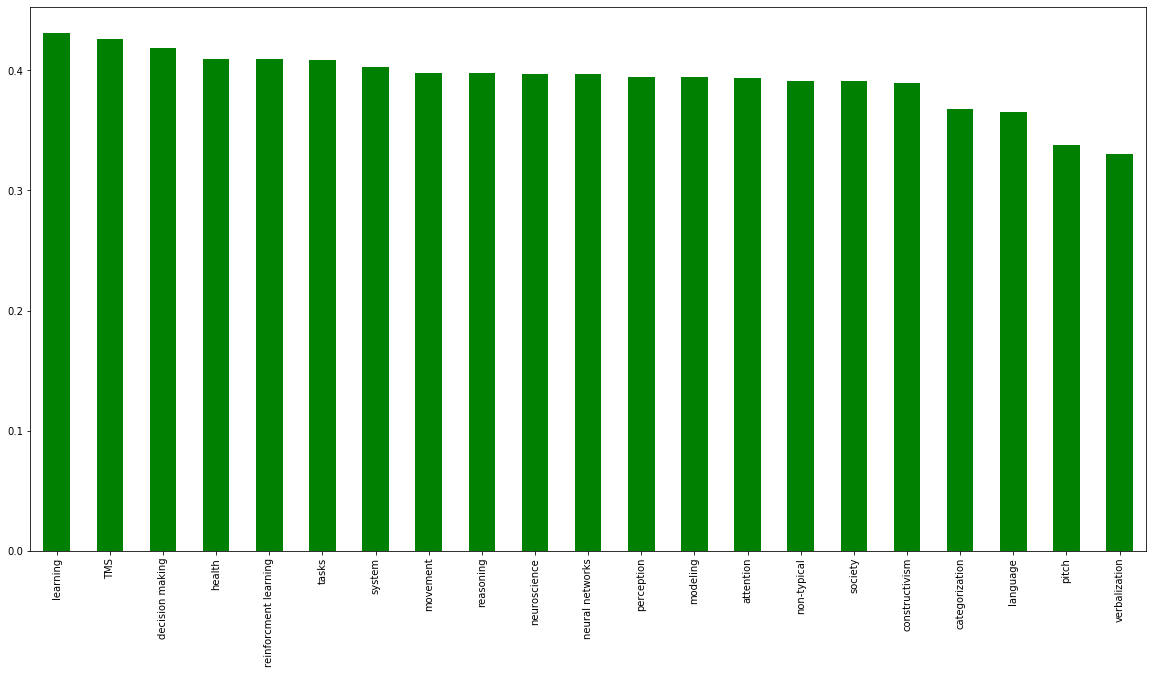

In [14]:
# plot for Conscientiousness
pandas.DataFrame(personality_by_topic).T.sort_values(by="Conscientiousness", ascending=False)["Conscientiousness"].plot(kind="bar", figsize=(20, 10), color="green")

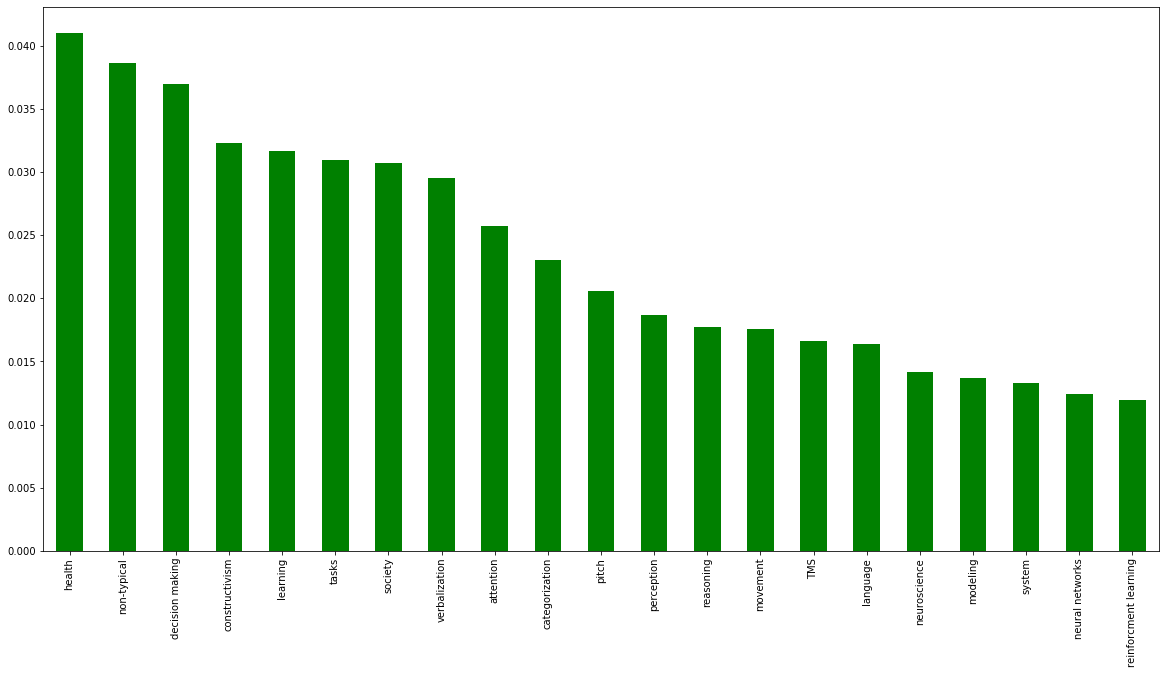

In [15]:
# plot for Agreeableness
pandas.DataFrame(personality_by_topic).T.sort_values(by="Agreeableness", ascending=False)["Agreeableness"].plot(kind="bar", figsize=(20, 10), color="green")

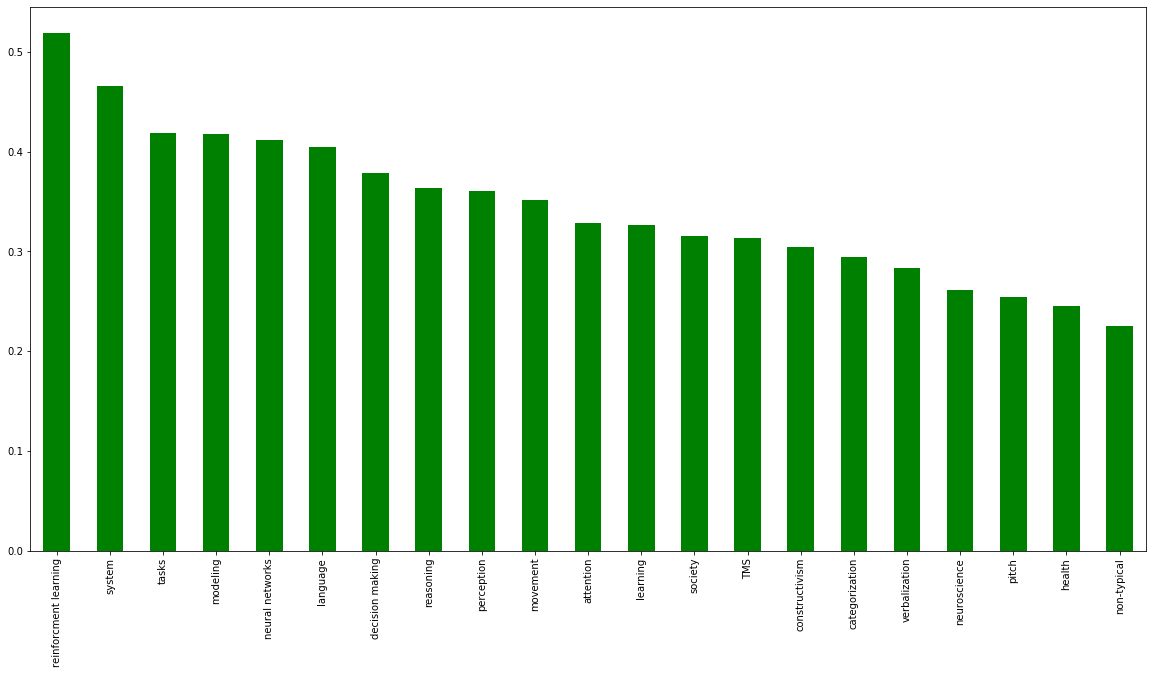

In [16]:
# Plot for emotional range
pandas.DataFrame(personality_by_topic).T.sort_values(by="Emotional range", ascending=False)["Emotional range"].plot(kind="bar", figsize=(20, 10), color="green")

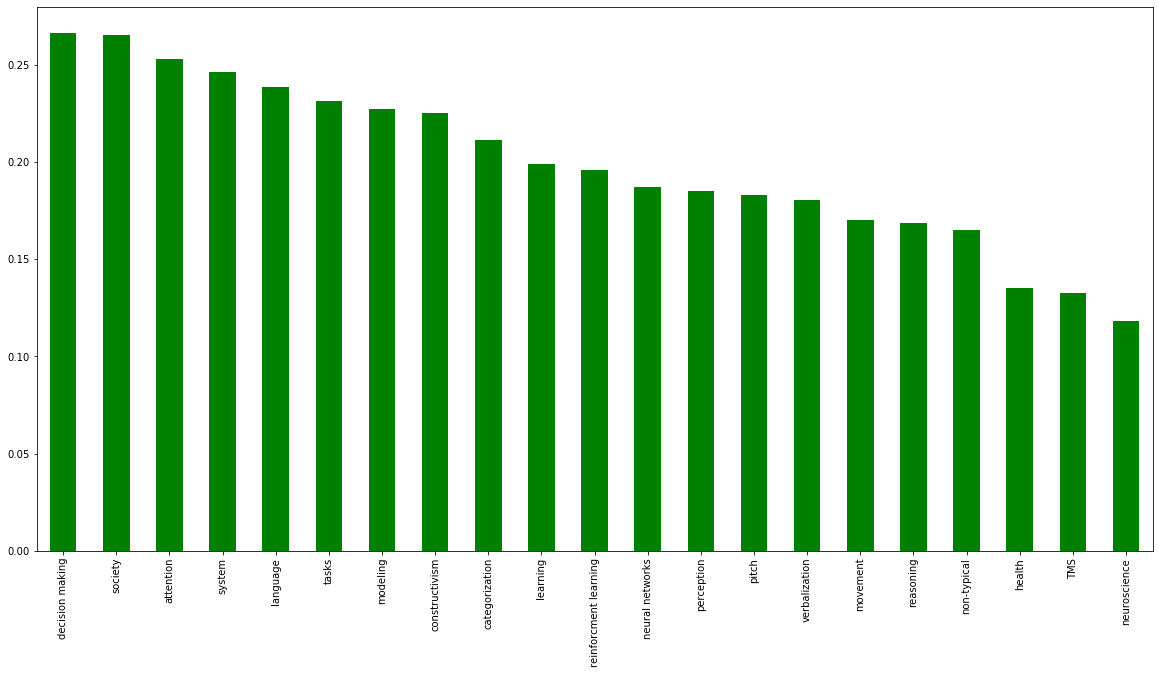

In [17]:
# plot for extraversion
pandas.DataFrame(personality_by_topic).T.sort_values(by="Extraversion", ascending=False)["Extraversion"].plot(kind="bar", figsize=(20, 10), color="green")

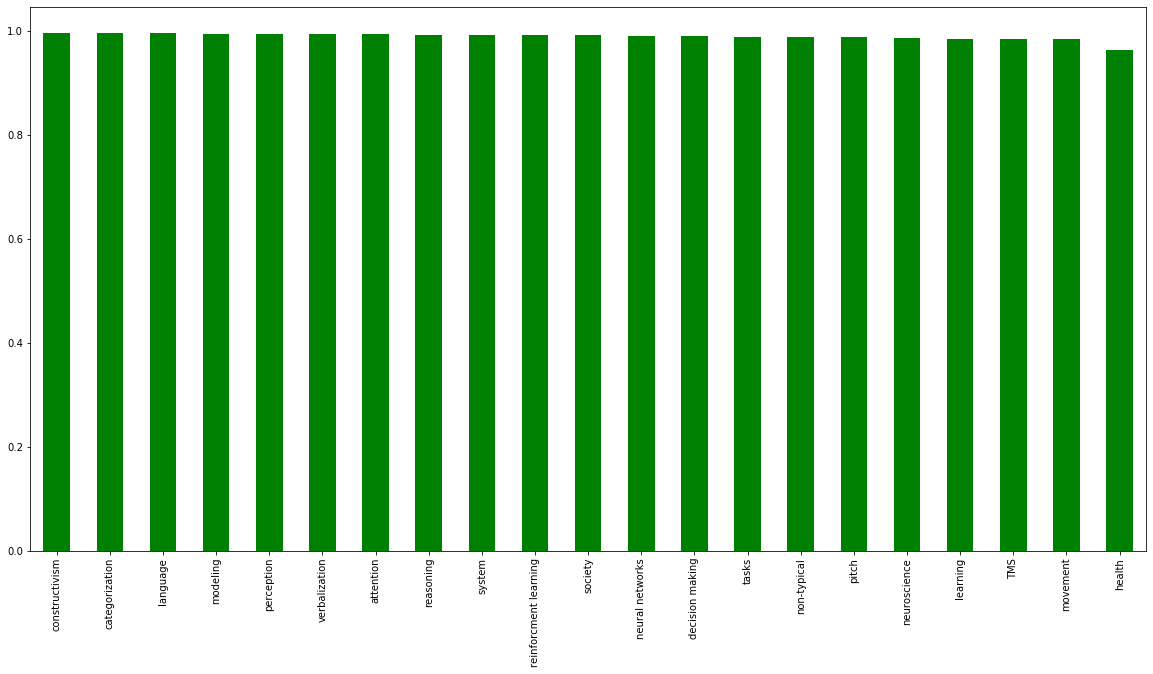

In [18]:
# plot for openess
pandas.DataFrame(personality_by_topic).T.sort_values(by="Openness", ascending=False)["Openness"].plot(kind="bar", figsize=(20, 10), color="green")